In [1]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import os

#helps resolve path problems
base = os.getcwd()

filepath =  os.path.join(base, "../data/cleaned_COUNTY_data.csv")

cleaned_df = pd.DataFrame(pd.read_csv(filepath))

In [2]:
#get target crops from txt file
with open("croptarget.txt") as f:
    crops = [line.strip() for line in f.readlines() if line.strip()]

print(crops)

['BARLEY', 'BEANS', 'BEETS', 'CANOLA', 'CORN', 'COTTON', 'GRAIN', 'GRASSES', 'GRASSES & LEGUMES, OTHER', 'GUAR', 'HAY', 'HAY & HAYLAGE', 'HAYLAGE', 'MILLET', 'MINT', 'MISCANTHUS', 'MUSTARD', 'OATS', 'PEANUTS', 'POPcorn', 'RICE', 'RYE', 'SAFFLOWER', 'SESAME', 'SORGHUM', 'SUGARCANE', 'SUNFLOWER', 'TRITICALE', 'WHEAT']


In [3]:
#NaN values for unreported numbers from farms
cleaned_df = cleaned_df.fillna(0)
cleaned_df.drop("Unnamed: 0",axis=1,inplace=True)
cleaned_df

,YEAR,AGLAND_AGLANDACRES,AGLAND_AGLANDCROPINSURANCEACRES,AGLAND_AGLANDCROPINSURANCENUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDACRES,AGLAND_AGLANDCROPLANDAREAMEASUREDINPCTOFAGLAND,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDACRES,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDALLCROPSFAILEDACRES,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDALLCROPSFAILEDNUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDCULTIVATEDSUMMERFALLOWACRES,...,WHEAT_WHEATSPRINGEXCLDURUMOPERATIONSWITHAREAHARVESTED,WHEAT_WHEATSPRINGEXCLDURUMPRODUCTIONMEASUREDINBU,WHEAT_WHEATWINTERACRESHARVESTED,WHEAT_WHEATWINTERIRRIGATEDACRESHARVESTED,WHEAT_WHEATWINTERIRRIGATEDOPERATIONSWITHAREAHARVESTED,WHEAT_WHEATWINTEROPERATIONSWITHAREAHARVESTED,WHEAT_WHEATWINTERPRODUCTIONMEASUREDINBU,WOOL_WOOLOPERATIONSWITHPRODUCTION,WOOL_WOOLPRODUCTIONMEASUREDINLB,WOOL_WOOLSALESMEASUREDIN
0,2012,7391.0,10512.0,32.0,70333.0,13.75,4862.0,3134.0,85.0,858.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2017,32795.0,14907.0,14.0,63774.0,13.75,4239.5,1979.0,59.0,2112.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2022,32469.0,16196.0,41.0,69021.0,13.75,5632.0,2740.0,103.0,3542.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2012,24662.0,23915.0,19.0,71517.0,8.00,29342.5,9247.0,26.0,7806.0,...,0.0,0.0,1500.0,320.0,2.0,2.0,31400.0,1.0,2250.0,0.0
4,2017,32830.0,322066.0,12.0,78257.0,8.00,35201.5,9247.0,12.0,7806.0,...,0.0,0.0,1500.0,320.0,4.0,7.0,31400.0,2.0,2250.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2017,15203.0,21736.0,21.0,18856.0,6.50,12208.0,247.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
758,2022,4025.0,23413.0,17.0,5980.0,6.50,1897.5,247.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
759,2012,295056.0,50198.0,39.0,95980.0,9.50,11980.5,4298.0,27.0,4936.0,...,1.0,0.0,3978.0,2206.0,10.0,23.0,247228.0,1.0,0.0,0.0
760,2017,401018.0,57149.0,39.0,76046.0,9.50,15045.0,1731.0,12.0,10893.0,...,2.0,0.0,3978.0,2206.0,13.0,19.0,247228.0,1.0,0.0,0.0


In [4]:
((cleaned_df == 0).sum() / len(cleaned_df)) * 100


YEAR                                             0.000000
AGLAND_AGLANDACRES                               1.181102
AGLAND_AGLANDCROPINSURANCEACRES                  1.181102
AGLAND_AGLANDCROPINSURANCENUMBEROFOPERATIONS     0.000000
AGLAND_AGLANDCROPLANDACRES                       0.393701
                                                  ...    
WHEAT_WHEATWINTEROPERATIONSWITHAREAHARVESTED    12.992126
WHEAT_WHEATWINTERPRODUCTIONMEASUREDINBU         35.433071
WOOL_WOOLOPERATIONSWITHPRODUCTION               12.598425
WOOL_WOOLPRODUCTIONMEASUREDINLB                 31.889764
WOOL_WOOLSALESMEASUREDIN                        79.921260
Length: 2176, dtype: float64

In [5]:
#find columns based on <crop> _ PRODUCTION for target df
target_cols = [
    col for col in cleaned_df.columns
    if col.split("_")[0] in crops and "PRODUCTION" in col.upper()
]

target_df = cleaned_df[target_cols]

In [6]:
target_df

,BARLEY_BARLEYPRODUCTIONMEASUREDINBU,BEANS_BEANSDRYEDIBLEEXCLCHICKPEASLIMAPRODUCTIONMEASUREDINCWT,BEANS_BEANSDRYEDIBLEEXCLLIMAPRODUCTIONMEASUREDINCWT,CANOLA_CANOLAPRODUCTIONMEASUREDINLB,CORN_CORNGRAINPRODUCTIONMEASUREDINBU,CORN_CORNSILAGEPRODUCTIONMEASUREDINTONS,COTTON_COTTONPIMAPRODUCTIONMEASUREDINBALES,COTTON_COTTONPRODUCTIONMEASUREDINBALES,COTTON_COTTONUPLANDPRODUCTIONMEASUREDINBALES,GRAIN_GRAINPRODUCTIONCONTRACTOPERATIONSWITHPRODUCTION,...,SUGARCANE_SUGARCANESEEDPRODUCTIONMEASUREDINTONS,SUGARCANE_SUGARCANESUGARPRODUCTIONMEASUREDINTONS,SUGARCANE_SUGARCANESUGARSEEDPRODUCTIONMEASUREDINTONS,SUNFLOWER_SUNFLOWERNONOILTYPEPRODUCTIONMEASUREDINLB,SUNFLOWER_SUNFLOWEROILTYPEPRODUCTIONMEASUREDINLB,SUNFLOWER_SUNFLOWERPRODUCTIONMEASUREDINLB,TRITICALE_TRITICALEPRODUCTIONMEASUREDINBU,WHEAT_WHEATPRODUCTIONMEASUREDINBU,WHEAT_WHEATSPRINGEXCLDURUMPRODUCTIONMEASUREDINBU,WHEAT_WHEATWINTERPRODUCTIONMEASUREDINBU
0,0.0,42.0,0.0,0.0,47125.0,1755.0,0.0,1512.0,1512.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,24.0,0.0,0.0,337470.0,1755.0,0.0,1512.0,1512.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,60.0,0.0,0.0,192297.5,1755.0,0.0,1512.0,1512.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6189.0,6189.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31400.0,0.0,31400.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10336.0,10336.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31400.0,0.0,31400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
759,0.0,0.0,0.0,0.0,579481.0,0.0,0.0,12521.0,12521.0,0.0,...,0.0,0.0,0.0,315000.0,301788.0,459288.0,0.0,274370.0,0.0,247228.0
760,0.0,0.0,0.0,0.0,1104854.0,0.0,0.0,19746.0,19746.0,0.0,...,0.0,0.0,0.0,315000.0,253176.0,253176.0,0.0,333464.0,0.0,247228.0


In [7]:
((target_df == 0).sum())

BARLEY_BARLEYPRODUCTIONMEASUREDINBU                             732
BEANS_BEANSDRYEDIBLEEXCLCHICKPEASLIMAPRODUCTIONMEASUREDINCWT    729
BEANS_BEANSDRYEDIBLEEXCLLIMAPRODUCTIONMEASUREDINCWT             750
CANOLA_CANOLAPRODUCTIONMEASUREDINLB                             750
CORN_CORNGRAINPRODUCTIONMEASUREDINBU                            288
CORN_CORNSILAGEPRODUCTIONMEASUREDINTONS                         546
COTTON_COTTONPIMAPRODUCTIONMEASUREDINBALES                      705
COTTON_COTTONPRODUCTIONMEASUREDINBALES                          297
COTTON_COTTONUPLANDPRODUCTIONMEASUREDINBALES                    303
GRAIN_GRAINPRODUCTIONCONTRACTOPERATIONSWITHPRODUCTION           741
GRASSES_GRASSESBAHIAGRASSSEEDPRODUCTIONMEASUREDINLB             744
GRASSES_GRASSESRYEGRASSSEEDPRODUCTIONMEASUREDINLB               756
GRASSES_GRASSESSUDANGRASSSEEDPRODUCTIONMEASUREDINLB             759
GUAR_GUARPRODUCTIONMEASUREDINLB                                 729
HAYLAGE_HAYLAGEALFALFAPRODUCTIONMEASUREDINTONS  

In [8]:
((target_df == 0).sum()).min()


12

In [9]:
#from EDA we found Hay to have the most usable data at index 19
target_hay = target_df['HAY_HAYPRODUCTIONMEASUREDINTONS']

target_hay

0       93093.0
1       92932.0
2      103167.0
3        1877.0
4         795.0
         ...   
757      1066.0
758       882.0
759      9089.0
760     20933.0
761     19441.0
Name: HAY_HAYPRODUCTIONMEASUREDINTONS, Length: 762, dtype: float64

In [10]:
#drop target columns for model
cleaned_df.drop(target_df.columns, axis=1, inplace=True)
cleaned_df.shape

(762, 2134)

In [11]:
leakage_patterns = ["PRODUCTION", "HARVESTED", "HARVEST", "YIELD"]

mask = ~cleaned_df.columns.str.contains("|".join(leakage_patterns), case=False)

X_clean = cleaned_df.loc[:, mask]

In [12]:
X_clean.shape

(762, 1455)

In [13]:
#prep for tensorflow
X = X_clean.drop(X_clean.columns[[0,1454]], axis=1, errors="ignore")
y = target_hay

X = X.apply(pd.to_numeric, errors="coerce")

X

,AGLAND_AGLANDACRES,AGLAND_AGLANDCROPINSURANCEACRES,AGLAND_AGLANDCROPINSURANCENUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDACRES,AGLAND_AGLANDCROPLANDAREAMEASUREDINPCTOFAGLAND,AGLAND_AGLANDCROPLANDEXCLPASTUREDOPERATIONSWITHTREATED,AGLAND_AGLANDCROPLANDEXCLPASTUREDTREATEDMEASUREDINACRES,AGLAND_AGLANDCROPLANDNUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDPASTUREDONLYACRES,AGLAND_AGLANDCROPLANDPASTUREDONLYNUMBEROFOPERATIONS,...,VEGETABLETOTALS_VEGETABLETOTALSINCLSEEDSTRANSPLANTSINTHEOPENSALESMEASUREDIN,WALNUTS_WALNUTSENGLISHACRESBEARING,WALNUTS_WALNUTSENGLISHACRESBEARINGNONBEARING,WALNUTS_WALNUTSENGLISHACRESNONBEARING,WALNUTS_WALNUTSENGLISHOPERATIONSWITHAREABEARING,WALNUTS_WALNUTSENGLISHOPERATIONSWITHAREABEARINGNONBEARING,WALNUTS_WALNUTSENGLISHOPERATIONSWITHAREANONBEARING,WATER_WATERIRRIGATIONSOURCEOFFFARMSUPPLIERFEDERALBUREAUOFRECLAMATIONOPERATIONSWITHWATERRECEIVED,WHEAT_WHEATOPERATIONSWITHSALES,WHEAT_WHEATSALESMEASUREDIN
0,7391.0,10512.0,32.0,70333.0,13.75,349.0,16018.0,1252.0,6300.0,113.0,...,1271000.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0
1,32795.0,14907.0,14.0,63774.0,13.75,335.0,21529.0,1098.0,3018.0,76.0,...,1005000.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0
2,32469.0,16196.0,41.0,69021.0,13.75,341.0,19072.0,1041.0,6817.0,106.0,...,1402000.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0
3,24662.0,23915.0,19.0,71517.0,8.00,28.0,11196.0,113.0,3163.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
4,32830.0,322066.0,12.0,78257.0,8.00,30.0,13780.0,81.0,3163.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,15203.0,21736.0,21.0,18856.0,6.50,8.0,1275.0,52.0,3105.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
758,4025.0,23413.0,17.0,5980.0,6.50,3.0,1507.5,36.0,1953.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
759,295056.0,50198.0,39.0,95980.0,9.50,48.0,27759.0,118.0,42662.0,40.0,...,15082000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,1655000.0
760,401018.0,57149.0,39.0,76046.0,9.50,38.0,34367.0,121.0,17766.0,32.0,...,6494000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1044000.0


In [14]:
corr_matrix = pd.DataFrame(X).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop them
X_reduced = X.drop(columns=to_drop)
print("Dropped highly correlated features:", len(to_drop))

Dropped highly correlated features: 495


In [15]:
y.shape

(762,)

In [16]:
print(y.mean)

<bound method Series.mean of 0       93093.0
1       92932.0
2      103167.0
3        1877.0
4         795.0
         ...   
757      1066.0
758       882.0
759      9089.0
760     20933.0
761     19441.0
Name: HAY_HAYPRODUCTIONMEASUREDINTONS, Length: 762, dtype: float64>


In [17]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Step 1: Use the correlation-cleaned feature matrix
X_corrclean = X_reduced   # (after leakage removal + correlation filtering)

# Step 2: Initialize importance vector with correct length
importances = np.zeros(X_corrclean.shape[1])

# Step 3: Loop over each production target (each crop)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_corrclean, y.iloc[:,])
importances += rf.feature_importances_

# Step 4: Select top 200 most important features
top_idx = np.argsort(importances)[-200:]

# Step 6: Reduce dataset
X_reduced = X_corrclean.iloc[:, top_idx]


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_scaled)


In [20]:
X_pca

array([[ 6.96180412e+00, -5.06805181e+00, -1.26142018e+00, ...,
         2.57424615e-02,  4.95141188e-02,  5.06231458e-03],
       [ 6.15484995e+00, -4.48189627e+00, -1.11052769e+00, ...,
        -8.43373708e-02,  6.84300593e-03,  2.32888881e-04],
       [ 8.44494178e+00, -1.58713105e+00, -7.70913579e-01, ...,
        -8.93573215e-02, -5.21602963e-02,  6.92152501e-03],
       ...,
       [-4.42649074e+00,  5.00759308e-01,  1.62363352e+00, ...,
         3.81058036e-02, -2.67129886e-03, -1.46874754e-02],
       [-4.83632343e+00,  4.81725106e-01,  2.30904044e+00, ...,
        -1.12269452e-01,  8.24067778e-02, -4.13655566e-03],
       [-4.66710064e+00,  1.37199295e+00,  2.83004208e+00, ...,
        -2.38060207e-04,  1.59102893e-02, -2.32195447e-03]])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)


In [22]:
#This score is a lot better than when trying to predict production for all 42 crops
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.score(X_val, y_val))


0.722898308344092


In [23]:
X_train.shape

(609, 200)

In [24]:
y_train.shape

(609,)

In [25]:

#input_dim = (609,200) #X_train
#output_dim = (609,)   #y_train



model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=(200,),kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(1)  #single output for hay production
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

#if loss is too low(model not learning) stop
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

#reduce learnrate/step size through training to help model learn more patterns
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=20, min_lr=1e-5
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=500,
    batch_size=32,
    callbacks=[reduce_lr],
    verbose=2
)


Epoch 1/500
20/20 - 1s - loss: 2146269312.0000 - mae: 32350.5918 - val_loss: 2360163072.0000 - val_mae: 32353.2559 - lr: 0.0010 - 1s/epoch - 68ms/step
Epoch 2/500
20/20 - 0s - loss: 2144819584.0000 - mae: 32335.1602 - val_loss: 2358087168.0000 - val_mae: 32333.2617 - lr: 0.0010 - 123ms/epoch - 6ms/step
Epoch 3/500
20/20 - 0s - loss: 2141616768.0000 - mae: 32305.4375 - val_loss: 2354053888.0000 - val_mae: 32298.0879 - lr: 0.0010 - 110ms/epoch - 6ms/step
Epoch 4/500
20/20 - 0s - loss: 2135515904.0000 - mae: 32251.8203 - val_loss: 2346160128.0000 - val_mae: 32236.1348 - lr: 0.0010 - 107ms/epoch - 5ms/step
Epoch 5/500
20/20 - 0s - loss: 2123789696.0000 - mae: 32160.6543 - val_loss: 2332596736.0000 - val_mae: 32135.1992 - lr: 0.0010 - 106ms/epoch - 5ms/step
Epoch 6/500
20/20 - 0s - loss: 2105144576.0000 - mae: 32015.9375 - val_loss: 2310925312.0000 - val_mae: 31980.7852 - lr: 0.0010 - 105ms/epoch - 5ms/step
Epoch 7/500
20/20 - 0s - loss: 2075224832.0000 - mae: 31794.4180 - val_loss: 2277788

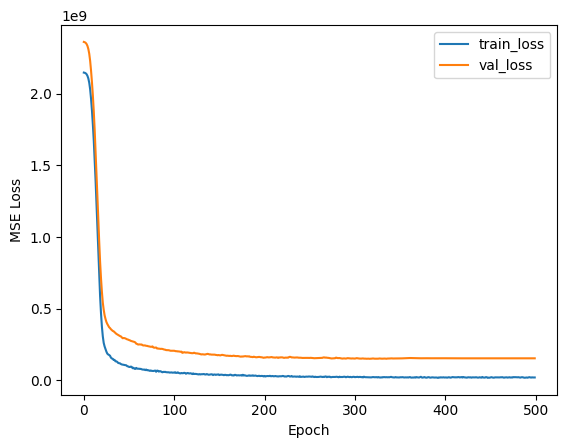

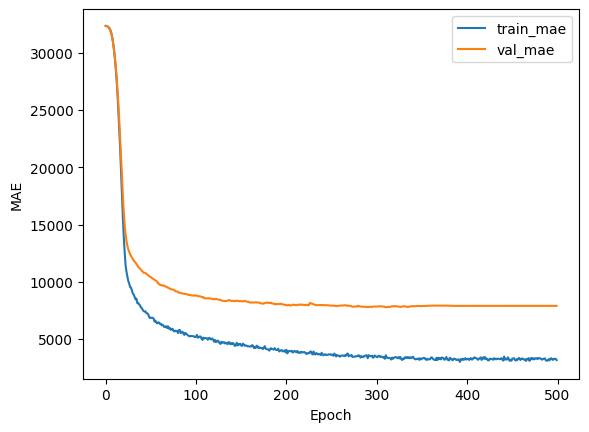

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


5/5 [==============================] - 0s 3ms/step


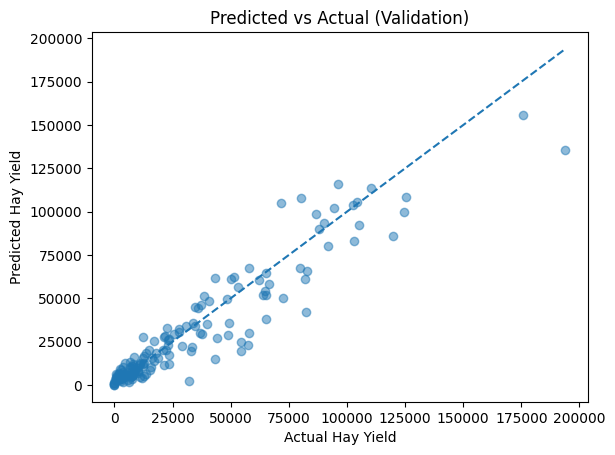

In [27]:
y_pred = model.predict(X_val).flatten()  

plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()],
         [y_val.min(), y_val.max()],
         linestyle='--')

plt.xlabel("Actual Hay Yield")
plt.ylabel("Predicted Hay Yield")
plt.title("Predicted vs Actual (Validation)")
plt.show()


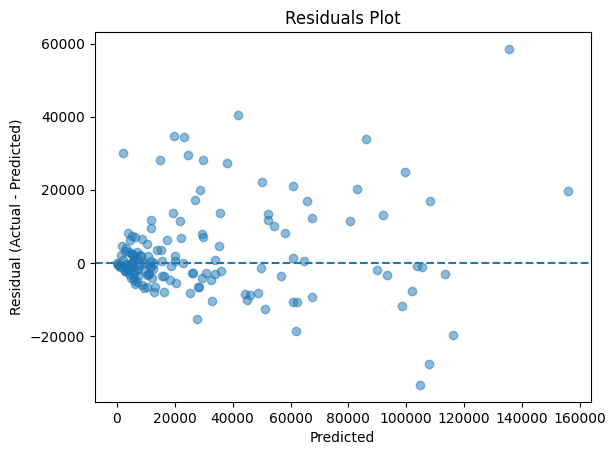

In [28]:
residuals = y_val - y_pred

plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()


In [29]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 12397.208672925544
R²: 0.8830091896146801
